# Comparando Stopwords

Incorporando el Corpus CREA

In [ ]:
# Bibliotecas
import nltk
#from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 4]
from re import sub
import numpy as np
import pandas as pd
from itertools import chain
import csv

def get_frequencies(vocabulary: Counter, n: int) -> list:
    return [_[1] for _ in vocabulary.most_common(n)]

def plot_frequencies(frequencies: list, title="Freq of words", log_scale=False):
    x = list(range(1, len(frequencies)+1))
    plt.plot(x, frequencies, "-v")
    plt.xlabel("Freq rank (r)")
    plt.ylabel("Freq (f)")
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    plt.title(title)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus_csv = pd.read_csv('crea_full.csv', delimiter='\t', encoding="latin-1")
crea_dict = pd.Series(corpus_csv.freq.values, index=corpus_csv.words).to_dict()
most_common_crea = Counter(crea_dict)

A partir de este corpus, con Zpif, vamos a determinar las stopwords

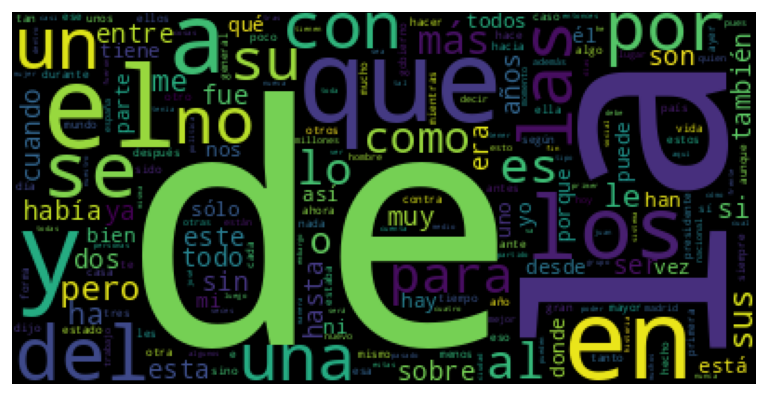

In [ ]:
zipf_cloud = WordCloud()

zipf_cloud.generate_from_frequencies(most_common_crea)

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(zipf_cloud)
plt.axis("off")
plt.show()

Importando las Stopwords de la paquetería nltk

In [ ]:
stopword_es = nltk.corpus.stopwords.words('spanish')
stopword_freq = Counter(stopword_es)

Generamos una nube de palabras de las Stopwords obtenidas con la paquetería nltk

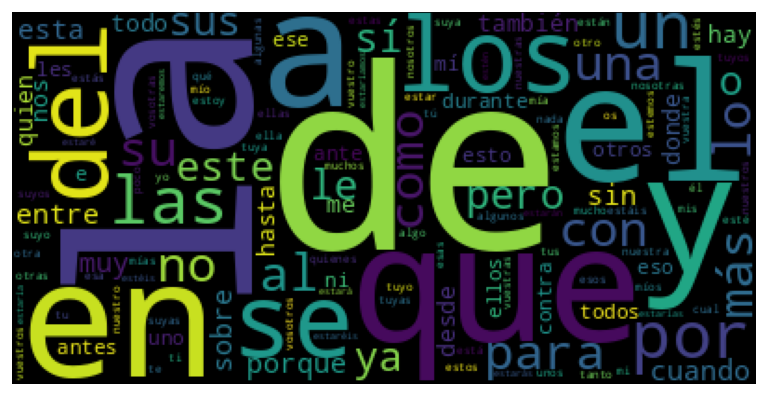

In [ ]:
nltk_cloud = WordCloud()

nltk_cloud.generate_from_frequencies(stopword_freq)

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(nltk_cloud)
plt.axis("off")
plt.show()



*   ¿Obtenemos el mismo resultado? ¿Por qué?

A simple vista, podemos decir que sí, las nubes son muy parecidas, podemos ver palabras como "de", "la", "que", "las", sin embargo, debemos de considerar que el resultado puede tener unas ligeras alteraciones ya que la paquetería nltk nos brinda una lista de stopwords, que si bien es muy útil para cuando queremos filtrar las palabras de nuestro texto, no nos brinda información acerca de las frequencias, ya que es una lista

In [ ]:
stopword_es[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Entonces, cuando estamos haciendo el Counter que utilizamos para la creación de la nube, tenemos que la frecuencia de todas las palbras será 1

In [ ]:
stopword_freq.most_common(10)

[('de', 1),
 ('la', 1),
 ('que', 1),
 ('el', 1),
 ('en', 1),
 ('y', 1),
 ('a', 1),
 ('los', 1),
 ('del', 1),
 ('se', 1)]

# Zipf en lenguaje artificial

Primer paso: Creación del lenguaje artificial

In [ ]:
import random

def generate_random_corpus(alfa_1, alfa_2, num_iteraciones):
  corpus = {}
  for x in range(num_iteraciones):
    frecuencia_random = random.randint(10,4000)
    len_random = random.randint(3, 17)
    part = len_random%5 +1
    new_word = ""
    for i in range(len_random):
      if ((i+1)%len_random)%2 == 0:
        new_word += alfa_1[random.randint(0, len(alfa_1)-1)]
      else:
        new_word += alfa_2[random.randint(0, len(alfa_2)-1)]
    corpus[new_word] = frecuencia_random
  return corpus


In [ ]:
roman = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
         'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

kata = ['カ', 'キ', 'ク', 'ケ', 'コ', 'サ', 'シ', 'ス', 'セ', 'ソ', 'タ', 'チ', 'ツ',
        'テ', 'ト', 'ナ', 'ニ', 'ヌ', 'ネ', 'ノ', 'ハ', 'ヒ', 'フ', 'ヘ', 'ホ', 'マ',
        'ミ', 'ム', 'メ', 'モ', 'ヤ', 'ユ', 'ヨ', 'ラ', 'リ', 'ル', 'レ', 'ロ']

art_corpus = generate_random_corpus(kata, roman, 3000)
list_to_show = list(art_corpus)
list_to_show[:10]

['xヘmラqマ',
 'kユvミiヤyト',
 'dロdシiツqハfロ',
 'xムhコxユlキjリaケlヤ',
 'hニmレgテhサケ',
 'fリtヌdモaヨwセlルsレpフ',
 'iマwタnノsミmソ',
 'iシbナvスaツgツzマyネvロ',
 'rタlルuモnリeソリ',
 'jノtクsリxナ']

Así hemos inventado el ✨**japañol**✨, con el que podríamos tener una oración como sigue, esperando que haga sentido si es que lo tiene:

xハク yヨbカmトyリgラ nケtヨ yテム

A este lenguaje inventado, también le creamos frecuencias aleatorias y veamos si es que así se cumpliría la ley de Zipf

In [ ]:
sorted_corpus = sorted(art_corpus.items(), key = lambda x:x [1], reverse = True)
japanol_dict = dict(sorted_corpus)
print(japanol_dict)

{'xモfサcナxヌnトカ': 3998, 'pヌzフbネjレzセgヌrユ': 3996, 'qミiラ': 3994, 'pサzナ': 3994, 'jムbチuシ': 3993, 'tテuカzナヌ': 3993, 'dミlルzフnツnタgシsヒtリ': 3992, 'dラdラgチシ': 3992, 'gハrチhロ': 3989, 'iシmタhヨ': 3988, 'uトrコoルfサyヌ': 3983, 'wセdセgロdノeチuヨbセvモ': 3983, 'vセbリeチヨ': 3983, 'pニbレjナcノhシhヘiテ': 3982, 'mリヒ': 3979, 'rルケ': 3977, 'lスqレmクtヤaレsヨfハ': 3975, 'fマuネoタfトlコヤ': 3975, 'kヤwフqメgレsユuツeネpフ': 3975, 'oテgヒiノlラeテhコユ': 3975, 'oヌメ': 3974, 'gネtミbニxトsモzヒqケ': 3973, 'xフdユgヤvクpセrコaテ': 3973, 'kサqツqホツ': 3967, 'kレaキhキpツhノmヤkネsム': 3965, 'jトxメ': 3964, 'pトuヌdモnホサ': 3963, 'nレヤ': 3962, 'aソkチaフzヤfヤyノrニフ': 3962, 'iヤlモfヒ': 3961, 'sキiテiムミ': 3959, 'vキvノdノsツyキ': 3956, 'pヌxフjミcルeクeフoハレ': 3953, 'lシtムeネpコmレテ': 3953, 'aマuムkカtケ': 3951, 'kナkヘeレdレソ': 3949, 'fキoシfメzケvフkツシ': 3949, 'bロpクhタvホニ': 3948, 'bセkサsネuシ': 3946, 'eホaコvネ': 3946, 'rクcカlソjラソ': 3943, 'xフxトhラhツuノkユzフユ': 3943, 'iルaチfレvクlノyモzネツ': 3942, 'lフmチkサuマsテシ': 3936, 'cレfネuヨ': 3936, 'zナwレqカfユ': 3936, 'rヤtモoクvナcナqテnロwホヨ': 3936, 'nネeタwミgソkトlハkルzテタ': 3935, 'zルbクス': 3934, 'cヌリ': 3932, 'pマqリxヘ': 3932, 'g

                palabra  freq
0           xモfサcナxヌnトカ  3998
1        pヌzフbネjレzセgヌrユ  3996
2                  qミiラ  3994
3                  pサzナ  3994
4                jムbチuシ  3993
...                 ...   ...
2995    fクiテfヘzフxカjトaノヤ    23
2996           nテsハsニeヘ    15
2997              hロaクコ    14
2998  gサxハsサuハmレgヤeコaトカ    12
2999      sヒtツcソvキqラgノヌ    10

[3000 rows x 2 columns]


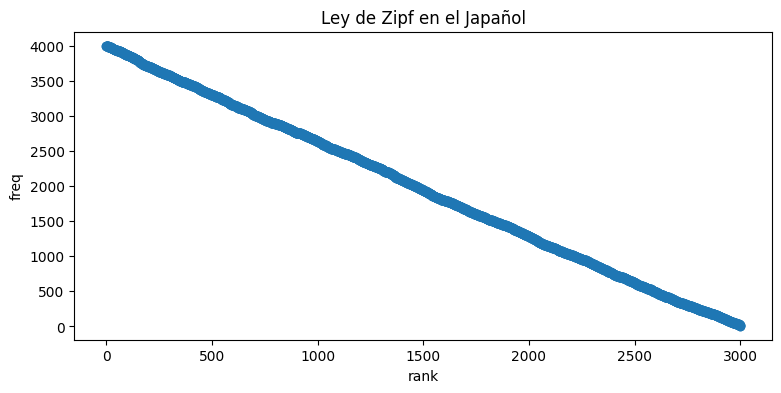

In [ ]:
my_language = pd.DataFrame({"palabra": japanol_dict.keys(), "freq": japanol_dict.values()})
print(my_language)
my_language["freq"].plot(marker="o")
plt.title('Ley de Zipf en el Japañol')
plt.xlabel('rank')
plt.ylabel('freq')
plt.show()

Asombrosamente, se ve que cumple con la distribución de Zipf, la verdad pensé que no lo iba a hacer porque a fin de cuentas se está generando aleatoriamente tanto la longitud de las palabras como su frecuencia, pero al parecer incluso así Zipf se cumple 😱